In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
credit_data = pd.read_csv('creditcard.csv')

In [47]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [49]:
credit_data.Class.unique()

array([0, 1], dtype=int64)

In [50]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
X = credit_data.drop(['Class'], axis = 1)
Y = credit_data['Class']

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

print(X,Y)
X, Y = smote.fit_resample(X, Y)
print(X,Y)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [67]:
inputs = {
    "V1" : tf.keras.Input(shape=(1,)),
    "V2" : tf.keras.Input(shape=(1,)),
    "V3" : tf.keras.Input(shape=(1,)),
    "V4" : tf.keras.Input(shape=(1,)),
    "V5" : tf.keras.Input(shape=(1,)),
    "V6" : tf.keras.Input(shape=(1,)),
    "V7" : tf.keras.Input(shape=(1,)),
    "V8" : tf.keras.Input(shape=(1,)),
    "V9" : tf.keras.Input(shape=(1,)),
    "V10" : tf.keras.Input(shape=(1,)),
    "V11" : tf.keras.Input(shape=(1,)),
    "V12" : tf.keras.Input(shape=(1,)),
    "V13" : tf.keras.Input(shape=(1,)),
    "V14" : tf.keras.Input(shape=(1,)),
    "V15" : tf.keras.Input(shape=(1,)),
    "V16" : tf.keras.Input(shape=(1,)),
    "V17" : tf.keras.Input(shape=(1,)),
    "V18" : tf.keras.Input(shape=(1,)),
    "V19" : tf.keras.Input(shape=(1,)),
    "V20" : tf.keras.Input(shape=(1,)),
    "V21" : tf.keras.Input(shape=(1,)),
    "V22" : tf.keras.Input(shape=(1,)),
    "V23" : tf.keras.Input(shape=(1,)),
    "V24" : tf.keras.Input(shape=(1,)),
    "V25" : tf.keras.Input(shape=(1,)),
    "V26" : tf.keras.Input(shape=(1,)),
    "V27" : tf.keras.Input(shape=(1,)),
    "V28" : tf.keras.Input(shape=(1,)),
    "Time" : tf.keras.Input(shape=(1,)),
    "Amount" : tf.keras.Input(shape=(1,)),
}

In [68]:
def build_model(my_inputs, my_learning_rate, METRICS):
  inputs = tf.keras.Input(shape=(30,),)
  x1 = layers.Dense(32, activation = 'relu')(inputs)
  x2 = layers.Dense(64, activation = 'relu')(x1)
  x3 = layers.Dense(128,activation='relu')(x2) 
  outputs = tf.keras.layers.Dense(1, activation='relu')(x3)
  
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=METRICS)
  return model

def train_model(model, x_train, y_train, epochs, label_name,
                batch_size = None, shuffle = True):
    history = model.fit(x = x_train, y = y_train, batch_size=batch_size,
                        epochs=epochs, shuffle=shuffle)
    
    hist = history.history

    return hist

In [69]:
learning_rate = 0.001
epochs = 25
batch_size = 250
label_name = 'Class'

METRICS = ['accuracy',
      tf.keras.metrics.AUC(name='auc_roc', curve='ROC'),
]

my_model = build_model(inputs, learning_rate, METRICS)

hist = train_model(my_model, x_train, y_train, epochs,
                           label_name, batch_size)


Epoch 1/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5017 - auc_roc: 0.5000 - loss: 8.0317
Epoch 2/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5004 - auc_roc: 0.5000 - loss: 8.0528
Epoch 3/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5007 - auc_roc: 0.5000 - loss: 8.0486
Epoch 4/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5009 - auc_roc: 0.5000 - loss: 8.0447
Epoch 5/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5000 - auc_roc: 0.5000 - loss: 8.0587
Epoch 6/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4998 - auc_roc: 0.5000 - loss: 8.0619
Epoch 7/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5006 - auc_roc: 0.5000 - loss: 8.0489
Epoch 8/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5002 - auc_roc: 0.5000 - loss: 8.0557
Epoch 9/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5017 - auc_roc: 0.5000 - loss: 8.0324
Epoch 10/25
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 6s 

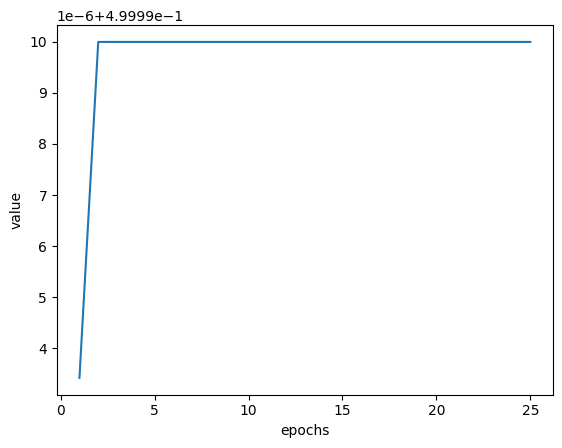

In [72]:
plt.figure()
plt.xlabel("epochs")
plt.ylabel("value")

x = hist['auc_roc']
print(plt.plot(range(1,len(x)+1), x, label = 'accuracy'))